In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#loading data
csv_file_path = "/Users/rushil/POCUS_B-Line_Prediction/create_image_metrics/NHANES/nhanes_data.csv"
data = pd.read_csv(csv_file_path)

data_above_50 = data[data['age'] > 50].copy()
print(data_above_50[['TMIMS', 'event']].describe())
data_above_50 = data_above_50.dropna(subset=['event'])
data_above_50.loc[:, 'gender_encoded'] = data_above_50['gender'].map({'Female': 0, 'Male': 1})

              TMIMS        event
count   4121.000000  4112.000000
mean   12052.607262     0.182150
std     3806.499701     0.386015
min     1072.906700     0.000000
25%     9421.107300     0.000000
50%    11861.754600     0.000000
75%    14485.713700     0.000000
max    36562.950400     1.000000


In [4]:
#filtering data + training model
X = data_above_50[['TMIMS', 'gender_encoded', 'age', 'BMI']]
Y = data_above_50['event']

Y = Y.dropna()
X = X.loc[Y.index]
X = X.dropna()
Y = Y.loc[X.index]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

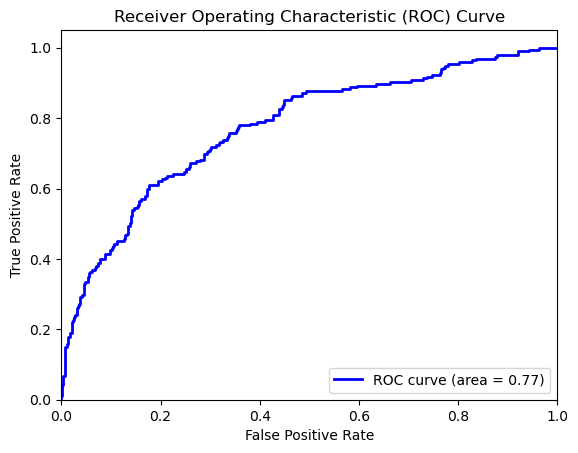

In [5]:
#getting predictions and plotting ROC curve
Y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
auc = roc_auc_score(Y_test, Y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [6]:
aucValues = []
for iteration in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=iteration)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, Y_train)
    Y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
    auc = roc_auc_score(Y_test, Y_pred_prob)
    aucValues.append(auc)

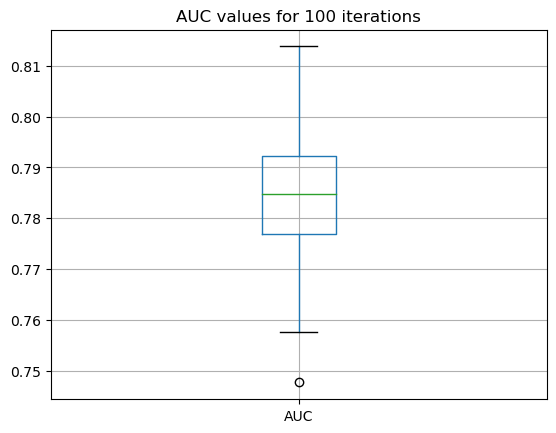

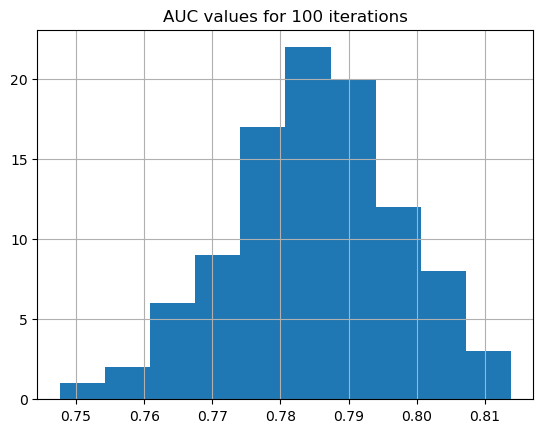

In [14]:
df = pd.DataFrame(aucValues, columns=['AUC'])

df.boxplot()
plt.title('AUC values for 100 iterations')
plt.show()

df.hist()
plt.title('AUC values for 100 iterations')
plt.show()

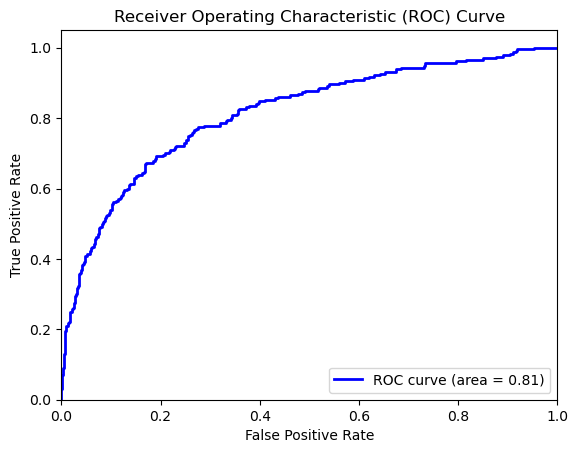

In [11]:
#train the model with the best auc
maxIDX = df.idxmax()[0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=maxIDX)
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
auc = roc_auc_score(Y_test, Y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8404605263157895 Coefficients of Model: [[-2.66108864e-04  6.40766786e-05  4.07640874e-02 -4.86805884e-02]] Intercepts of Model: [-0.00063792]


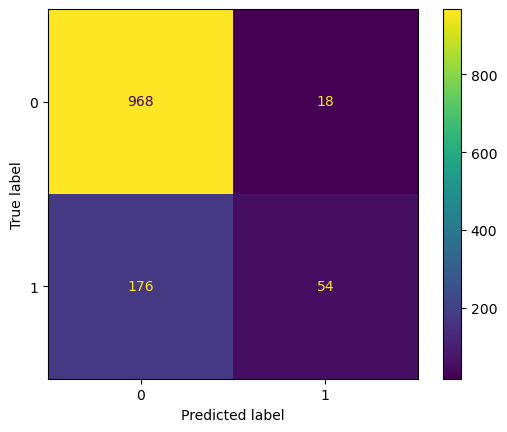

In [106]:
#get model statistics
accuracy = model.score(X_test, Y_test)
coefficients_model = model.coef_
intercept_model = model.intercept_
print("Accuracy:", accuracy, "Coefficients of Model:", coefficients_model, "Intercepts of Model:", intercept_model)

Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [102]:
#getting confusion matrix statistics
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

accuracy = (TN + TP) / (TN + FP + FN + TP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)

print("Accuracy:", accuracy, "PPV:", PPV, "NPV:", NPV, "Sensitivity:", Sensitivity, "Specificity:", Specificity)

Accuracy: 0.8404605263157895 PPV: 0.75 NPV: 0.8461538461538461 Sensitivity: 0.23478260869565218 Specificity: 0.9817444219066938
